In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('salary.csv')

In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

In [5]:
df.shape

(32561, 15)

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [7]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [8]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['salary'] = le.fit_transform(df['salary'])

In [10]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary             int64
dtype: object

<Axes: xlabel='salary', ylabel='count'>

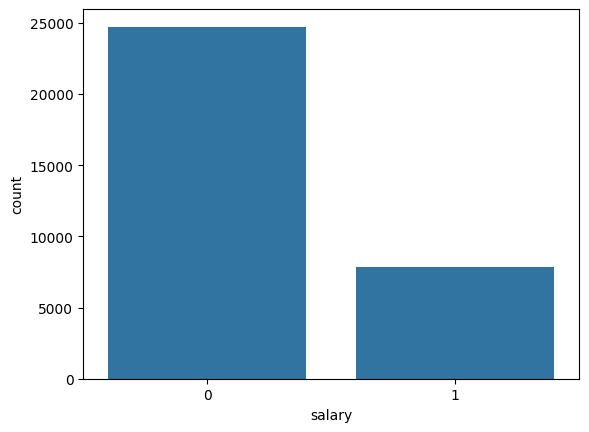

In [11]:
sns.countplot(x='salary',data=df)

In [12]:
df.corr(numeric_only=True)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
salary,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


<Axes: >

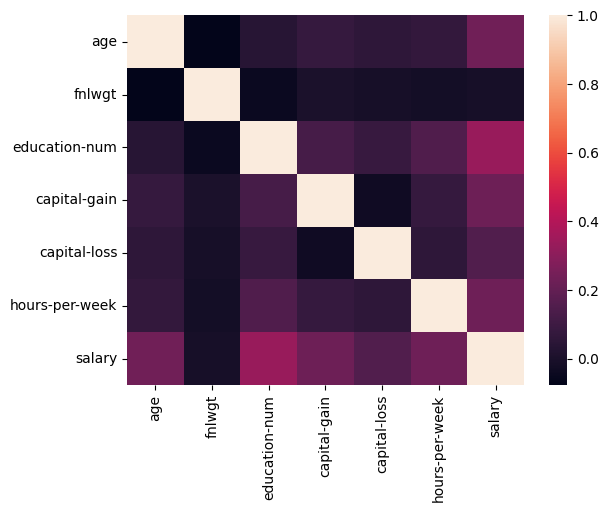

In [13]:
sns.heatmap(df.corr(numeric_only=True))

In [14]:
from scipy.stats import chi2_contingency
for col in ['workclass', 'education', 'marital-status', 'occupation', 'relationship','race','sex','native-country']:
    table = pd.crosstab(df[col], df['salary'])
    _, p, _, _ = chi2_contingency(table)
    print(f"{col}: p-value = {p:.4f} → {'Significant' if p < 0.05 else 'Not Significant'}")

workclass: p-value = 0.0000 → Significant
education: p-value = 0.0000 → Significant
marital-status: p-value = 0.0000 → Significant
occupation: p-value = 0.0000 → Significant
relationship: p-value = 0.0000 → Significant
race: p-value = 0.0000 → Significant
sex: p-value = 0.0000 → Significant
native-country: p-value = 0.0000 → Significant


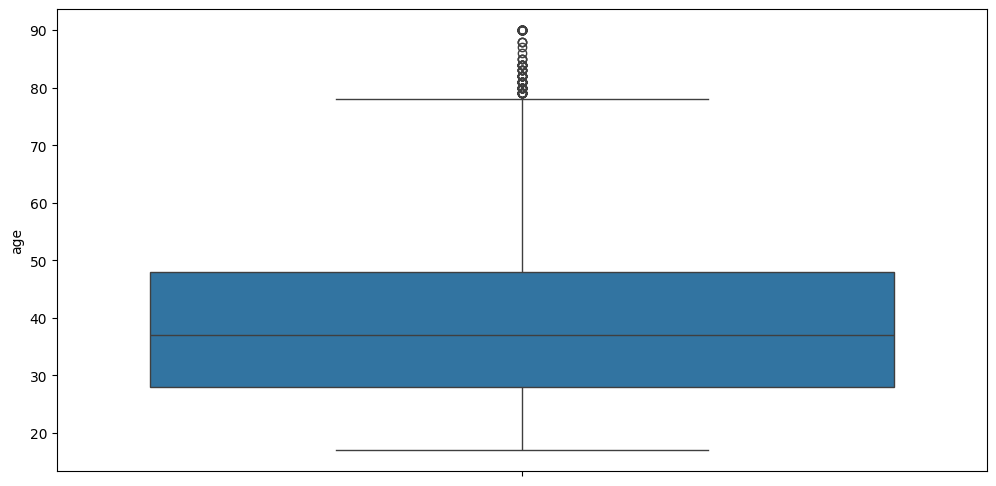

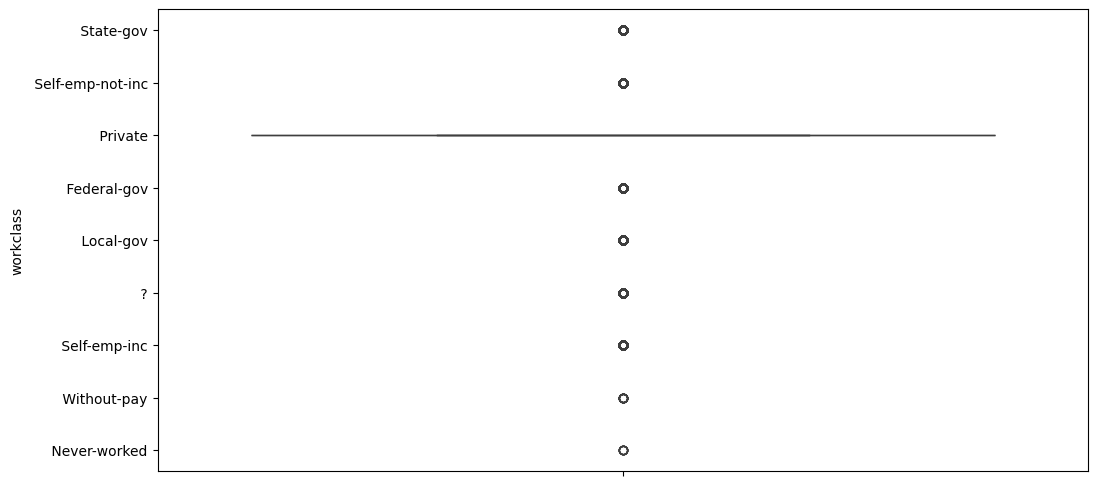

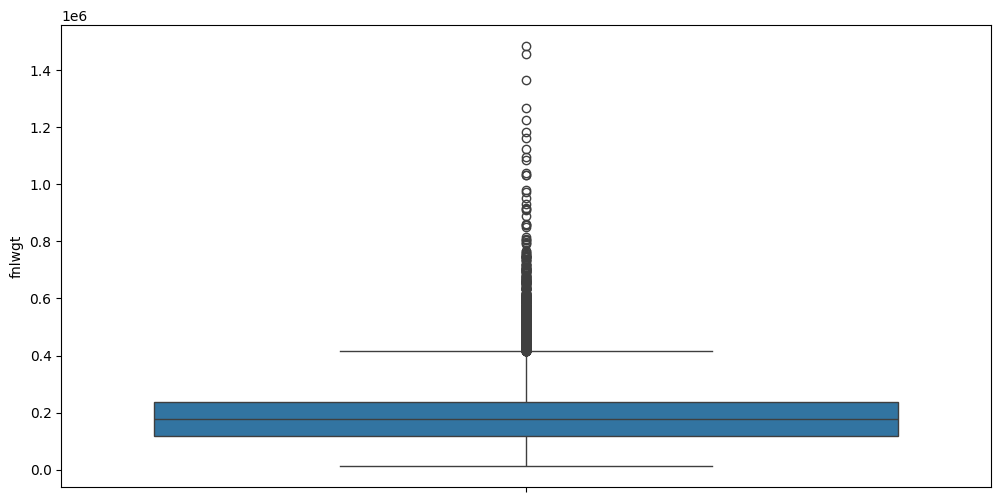

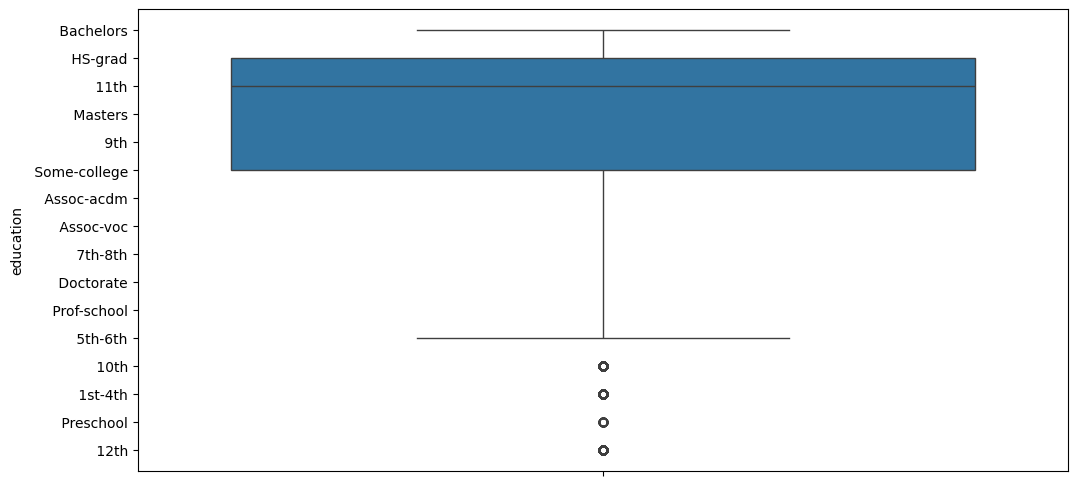

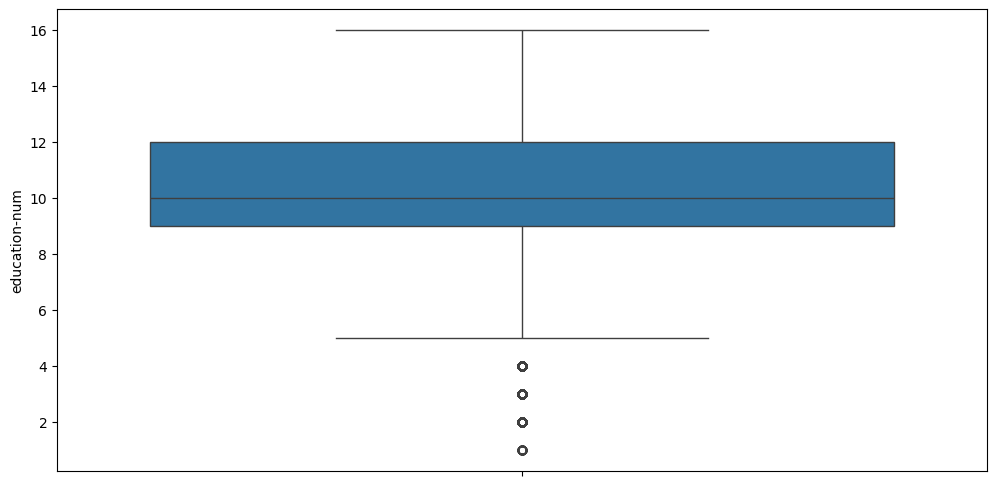

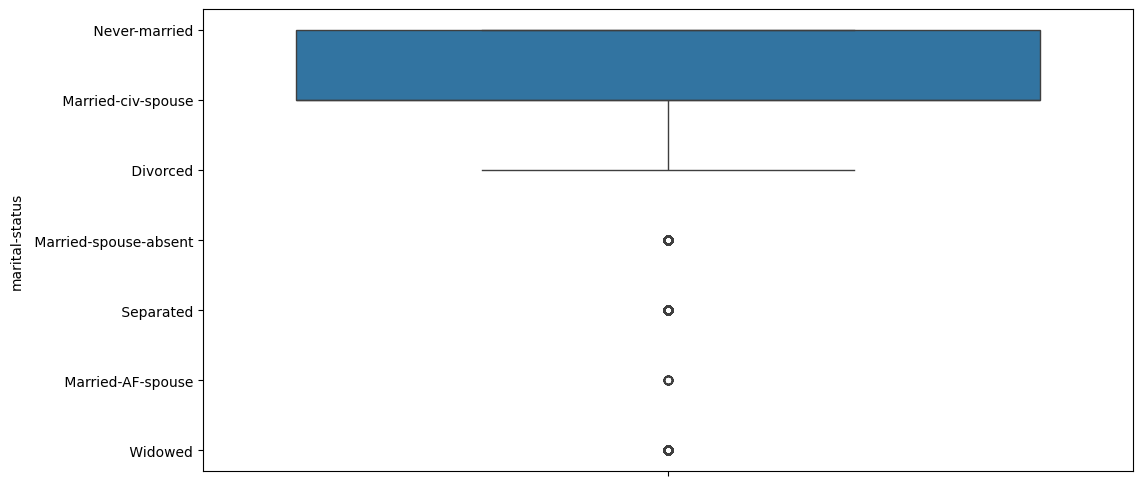

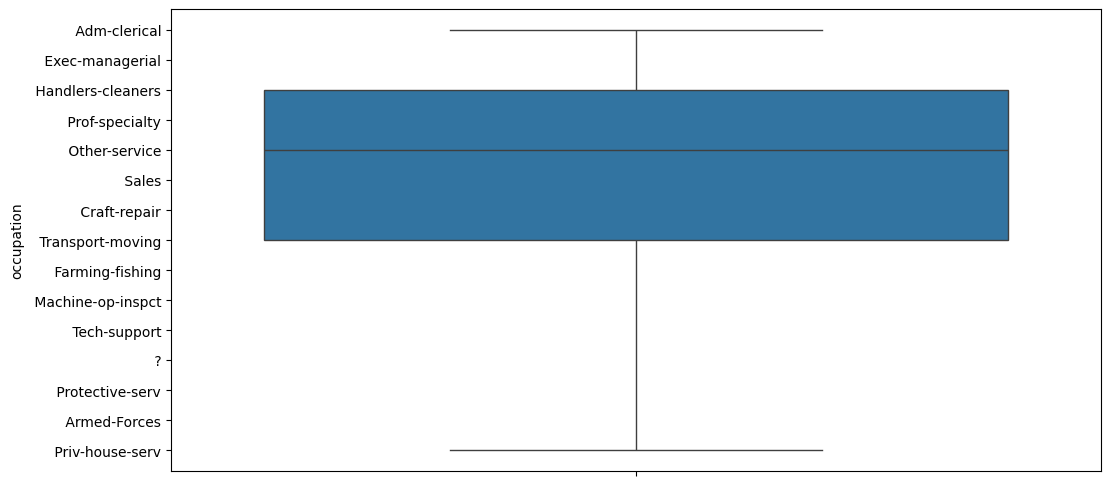

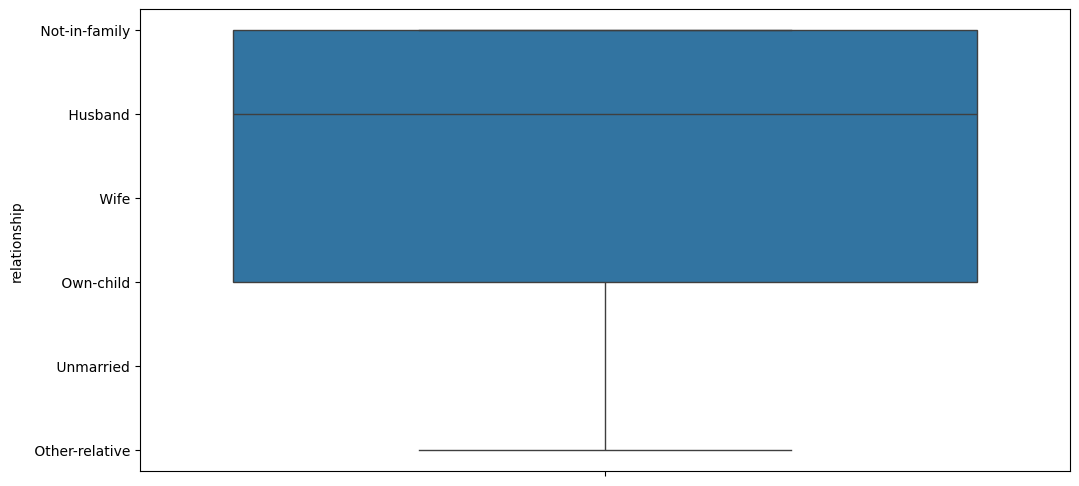

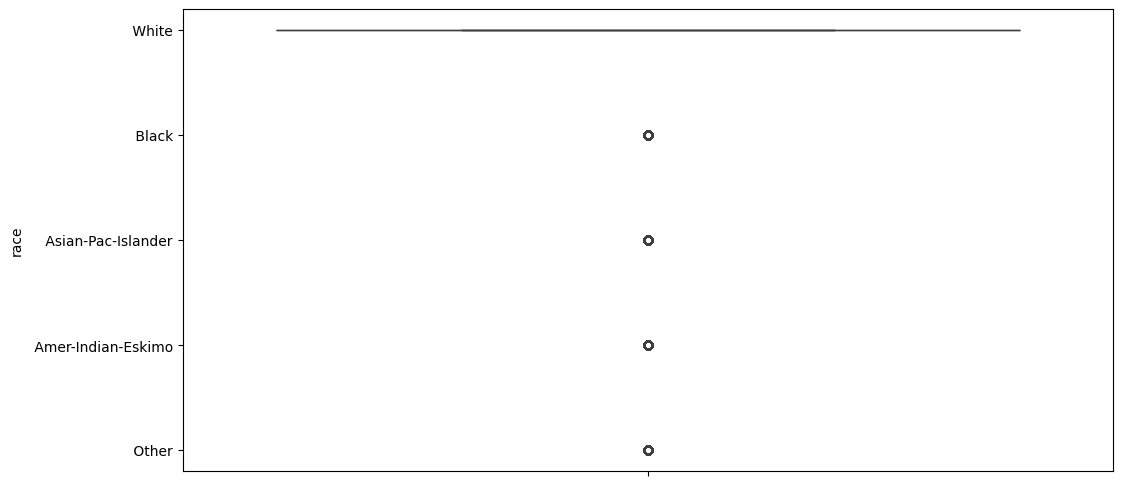

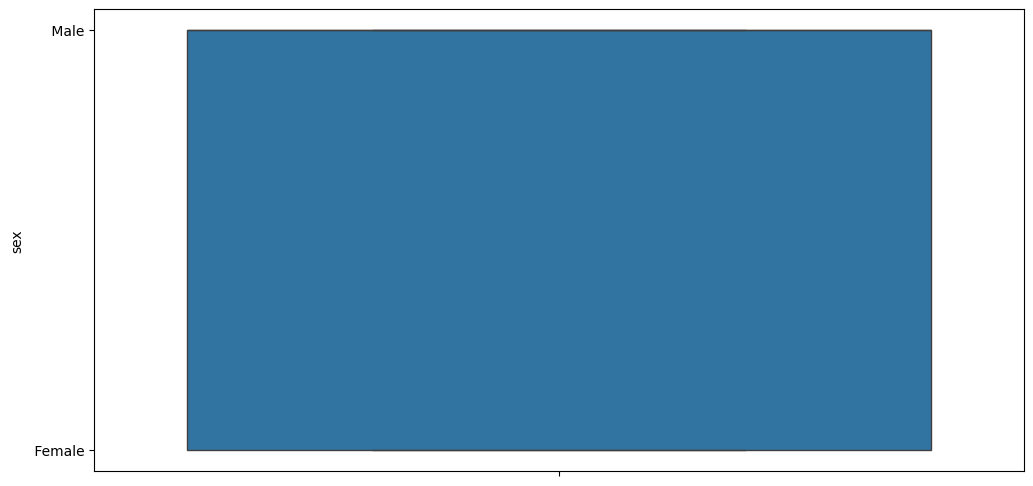

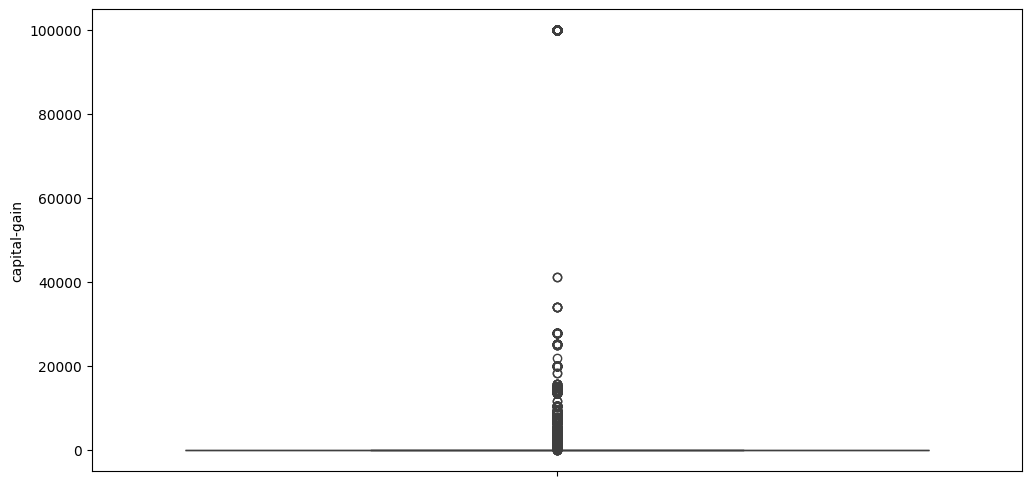

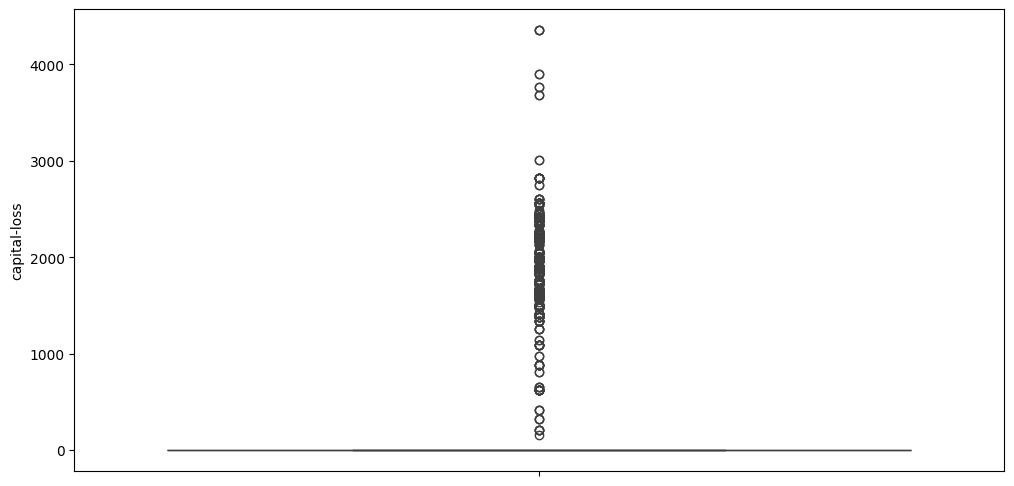

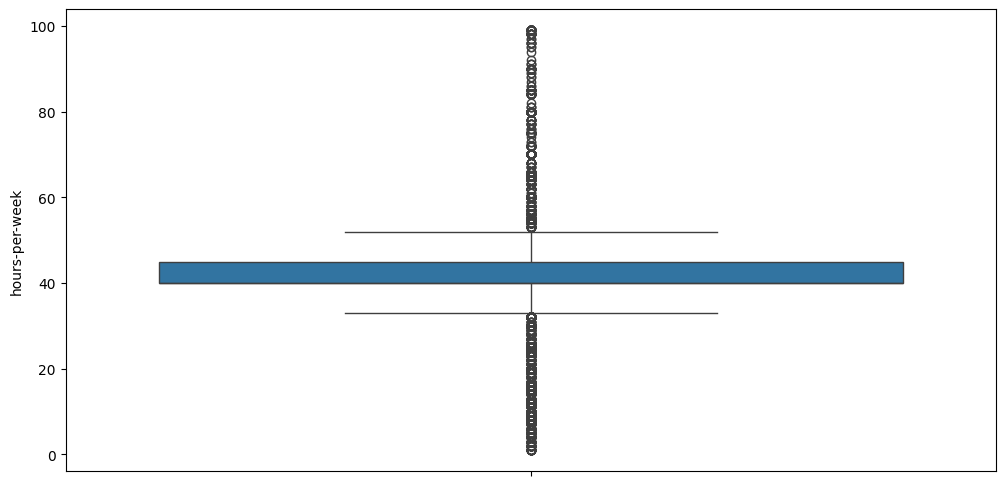

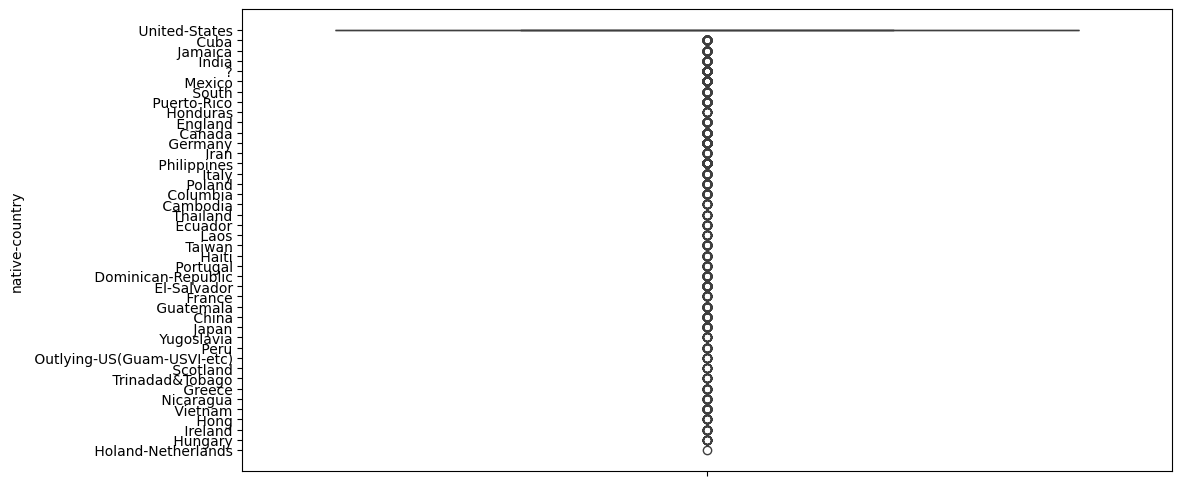

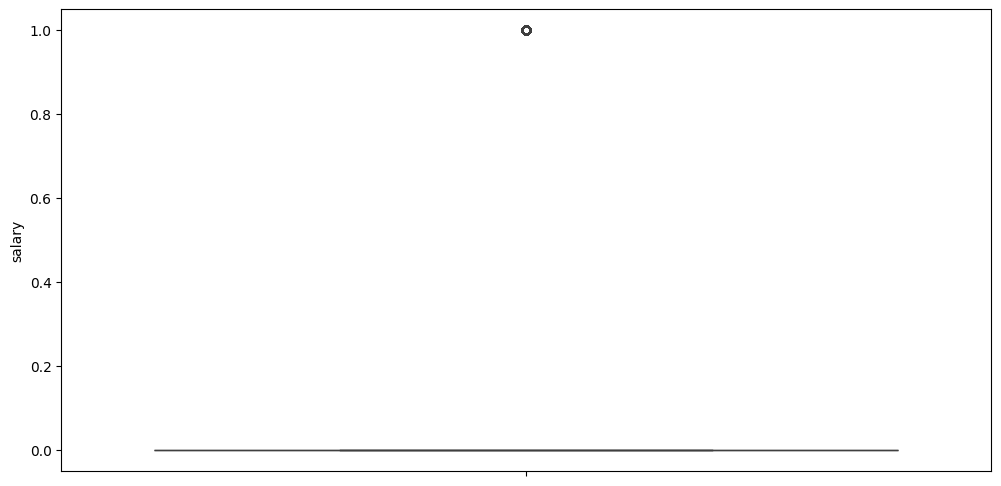

In [15]:
for column in df:
    plt.figure(figsize=(12,6))
    sns.boxplot(y=column,data=df)
    plt.show()

In [16]:


for col in df.select_dtypes(include='number').columns:
    if col == 'salary':
        continue 
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower) & (df[col] <= upper)]

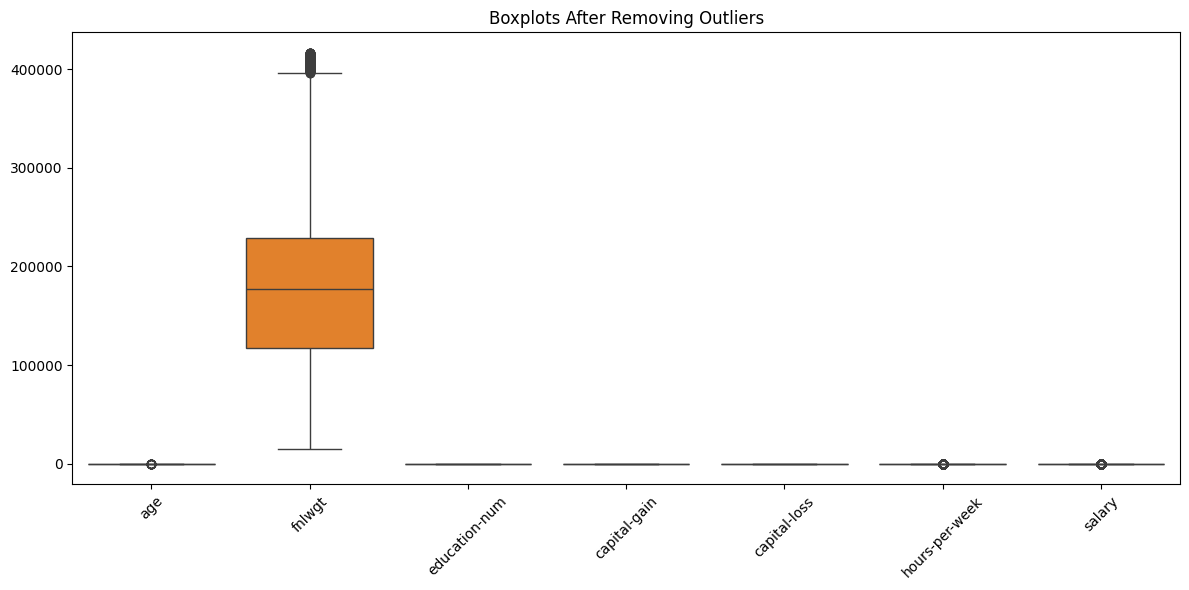

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=['number']))
plt.xticks(rotation=45)
plt.title('Boxplots After Removing Outliers')
plt.tight_layout()
plt.show()

In [18]:
dfe=pd.get_dummies(df[['workclass', 'education', 'marital-status', 'occupation', 'relationship','race','sex','native-country']],drop_first=True,dtype=int)
dfe

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32555,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32556,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [19]:
dfe.dtypes

workclass_ Federal-gov             int64
workclass_ Local-gov               int64
workclass_ Never-worked            int64
workclass_ Private                 int64
workclass_ Self-emp-inc            int64
                                   ...  
native-country_ Thailand           int64
native-country_ Trinadad&Tobago    int64
native-country_ United-States      int64
native-country_ Vietnam            int64
native-country_ Yugoslavia         int64
Length: 89, dtype: object

In [20]:
df_1=pd.concat([dfe,df],axis=True)

In [21]:
df_1.drop(['workclass', 'education', 'marital-status', 'occupation', 'relationship','race','sex','native-country'],axis=1,inplace=True)

In [22]:
df_1

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 11th,education_ 12th,...,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary
2,0,0,0,1,0,0,0,0,0,0,...,1,0,0,38,215646,9,0,0,40,0
3,0,0,0,1,0,0,0,0,1,0,...,1,0,0,53,234721,7,0,0,40,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,28,338409,13,0,0,40,0
5,0,0,0,1,0,0,0,0,0,0,...,1,0,0,37,284582,14,0,0,40,0
7,0,0,0,0,0,1,0,0,0,0,...,1,0,0,52,209642,9,0,0,45,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,0,0,0,1,0,0,0,0,0,0,...,1,0,0,53,321865,14,0,0,40,1
32555,0,0,0,1,0,0,0,0,0,0,...,1,0,0,22,310152,10,0,0,40,0
32556,0,0,0,1,0,0,0,0,0,0,...,1,0,0,27,257302,12,0,0,38,0
32557,0,0,0,1,0,0,0,0,0,0,...,1,0,0,40,154374,9,0,0,40,1


In [23]:
x=df_1.drop(['salary'],axis=1).values
x

array([[ 0,  0,  0, ...,  0,  0, 40],
       [ 0,  0,  0, ...,  0,  0, 40],
       [ 0,  0,  0, ...,  0,  0, 40],
       ...,
       [ 0,  0,  0, ...,  0,  0, 38],
       [ 0,  0,  0, ...,  0,  0, 40],
       [ 0,  0,  0, ...,  0,  0, 40]], shape=(19004, 95))

In [34]:
y=df_1['salary'].values
y

array([0, 0, 0, ..., 0, 1, 0], shape=(19004,))

<Axes: xlabel='salary', ylabel='count'>

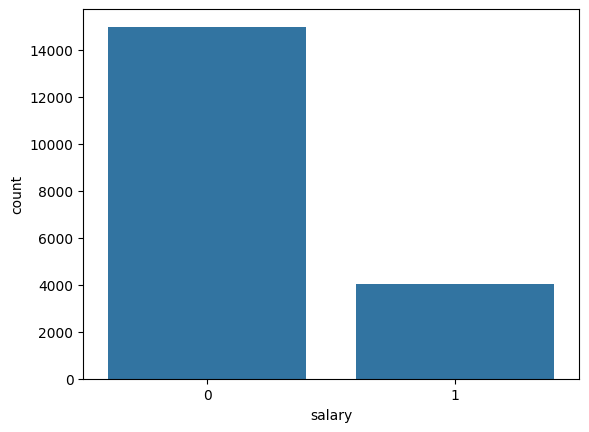

In [25]:
sns.countplot(x='salary',data=df)

In [26]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x,y)

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resampled,y_resampled,test_size=0.30,random_state=42)
x_train

array([[ 0,  0,  0, ...,  0,  0, 40],
       [ 0,  0,  0, ...,  0,  0, 40],
       [ 0,  0,  0, ...,  0,  0, 44],
       ...,
       [ 0,  0,  0, ...,  0,  0, 48],
       [ 0,  0,  0, ...,  0,  0, 40],
       [ 0,  0,  0, ...,  0,  0, 40]], shape=(20974, 95))

In [28]:
x_test

array([[ 0,  0,  0, ...,  0,  0, 40],
       [ 0,  0,  0, ...,  0,  0, 42],
       [ 0,  0,  0, ...,  0,  0, 40],
       ...,
       [ 0,  0,  0, ...,  0,  0, 48],
       [ 0,  0,  0, ...,  0,  0, 40],
       [ 0,  0,  0, ...,  0,  0, 42]], shape=(8990, 95))

In [29]:
y_train

27056    1
18468    0
23975    1
20823    1
6808     0
        ..
29802    1
5390     0
860      0
15795    0
23654    1
Name: salary, Length: 20974, dtype: int64

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [31]:
x_test

array([[-0.1538987 , -0.23088937, -0.01054737, ...,  0.        ,
         0.        , -0.46661343],
       [-0.1538987 , -0.23088937, -0.01054737, ...,  0.        ,
         0.        ,  0.05715417],
       [-0.1538987 , -0.23088937, -0.01054737, ...,  0.        ,
         0.        , -0.46661343],
       ...,
       [-0.1538987 , -0.23088937, -0.01054737, ...,  0.        ,
         0.        ,  1.62845697],
       [-0.1538987 , -0.23088937, -0.01054737, ...,  0.        ,
         0.        , -0.46661343],
       [-0.1538987 , -0.23088937, -0.01054737, ...,  0.        ,
         0.        ,  0.05715417]], shape=(8990, 95))

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay
knn=KNeighborsClassifier(n_neighbors=7)
naive=BernoulliNB()
support=SVC()
lst=[knn,naive,support]

In [33]:
for i in lst:
    i.fit(x_train,y_train)
    y_predict=i.predict(x_test)
    print("performance evaluation of :- ",i)
    print("confusion_matrix is :-",confusion_matrix(y_test,y_predict))
    print("*"*100)
    print("accuracy score is :-",accuracy_score(y_test,y_predict))
    print("*"*100)
    print("classification report is :-",classification_report(y_test,y_predict))
    print("*"*100)

performance evaluation of :-  KNeighborsClassifier(n_neighbors=7)
confusion_matrix is :- [[4030  516]
 [ 603 3841]]
****************************************************************************************************
accuracy score is :- 0.8755283648498331
****************************************************************************************************
classification report is :-               precision    recall  f1-score   support

           0       0.87      0.89      0.88      4546
           1       0.88      0.86      0.87      4444

    accuracy                           0.88      8990
   macro avg       0.88      0.88      0.88      8990
weighted avg       0.88      0.88      0.88      8990

****************************************************************************************************
performance evaluation of :-  BernoulliNB()
confusion_matrix is :- [[3700  846]
 [ 435 4009]]
********************************************************************************************